In [280]:
import pandas as pd

In [281]:
df1 = pd.read_csv('sentiments.csv')
df2 = pd.read_csv('quoteData2018_11.csv')
df3 = pd.read_csv('quoteData2018_12.csv')

In [282]:
df1.head()

,"Timestamp,Compound_Score,Total_Num_Tweets,Num_Negatives,Num_Positives,Num_Neutrals,Open,High,Low,Close,Volume (BTC),Volume (Currency)"
0,"2017-08-01 00:00:00,0.08289331823329567,1027.0..."
1,"2017-08-01 01:00:00,0.05315977564102566,778.0,..."
2,"2017-08-01 02:00:00,0.12425079872204475,836.0,..."
3,"2017-08-01 03:00:00,-0.021036500000000062,984...."
4,"2017-08-01 04:00:00,0.0554374592833876,751.0,1..."


In [283]:
df2.head()

,symbol_id,time_exchange,time_coinapi,ask_price,ask_size,bid_price,bid_size
0,DERIBIT_OPT_BTC_USD_181228_5000_P,2018-11-01T00:00:37.5300060Z,2018-11-01T00:01:05.0226287Z,0.0110,5.1,0.0095,6.0
1,DERIBIT_OPT_BTC_USD_181228_5000_P,2018-11-02T00:01:16.6161383Z,2018-11-02T00:01:48.2703838Z,0.0075,5.0,0.0070,1.0
2,DERIBIT_OPT_BTC_USD_181228_5000_P,2018-11-03T01:42:04.8237324Z,2018-11-03T01:42:06.6658697Z,0.0075,5.3,0.0065,0.1
3,DERIBIT_OPT_BTC_USD_181228_5000_P,2018-11-04T00:10:43.5718090Z,2018-11-04T00:11:13.7479445Z,0.0110,8.9,0.0065,1.1
4,DERIBIT_OPT_BTC_USD_181228_5000_P,2018-11-05T00:06:04.5255129Z,2018-11-05T00:06:19.7365295Z,0.0095,7.0,0.0065,0.2


In [284]:
#convert sentiment into parseable df
dfSentiment = pd.DataFrame(columns="Timestamp,Compound_Score,Total_Num_Tweets,Num_Negatives,Num_Positives,Num_Neutrals,Open,High,Low,Close,Volume (BTC),Volume (Currency)".split(","))
for index, row in df1.iterrows():
    row = (row['Timestamp,Compound_Score,Total_Num_Tweets,Num_Negatives,Num_Positives,Num_Neutrals,Open,High,Low,Close,Volume (BTC),Volume (Currency)'].split(","))
    #print(row)
    if (len(row) > 12):
        row = row[0:12]
    if (len(row) == 12):
        row_series = pd.Series(row, index = dfSentiment.columns)
        dfSentiment = dfSentiment.append(row_series, ignore_index=True)

In [285]:
dfSentiment.head()

,Timestamp,Compound_Score,Total_Num_Tweets,Num_Negatives,Num_Positives,Num_Neutrals,Open,High,Low,Close,Volume (BTC),Volume (Currency)
0,2017-08-01 00:00:00,0.08289331823329567,1027.0,139.0,347.0,397.0,2855.81,2863.06,2823.0,2825.92,184.02,522951.00
1,2017-08-01 01:00:00,0.05315977564102566,778.0,111.0,193.0,320.0,2823.01,2860.02,2821.01,2853.38,77.3,219605.16
2,2017-08-01 02:00:00,0.12425079872204475,836.0,89.0,273.0,264.0,2846.27,2858.04,2837.31,2841.6,135.83,386739.15
3,2017-08-01 03:00:00,-0.021036500000000062,984.0,250.0,236.0,314.0,2841.84,2863.88,2837.73,2862.93,143.2,408360.03
4,2017-08-01 04:00:00,0.0554374592833876,751.0,114.0,195.0,305.0,2862.92,2876.0,2848.11,2874.99,222.53,637045.88


In [286]:
#Make new dataframe with time stamp

dfNovemberSentiment = pd.DataFrame(columns="Timestamp,Compound_Score,Total_Num_Tweets,Num_Negatives,Num_Positives,Num_Neutrals,Open,High,Low,Close,Volume (BTC),Volume (Currency)".split(","))
#dfNovemberOptions

for index, row in dfSentiment.iterrows():
    row_series = pd.Series(row, index = dfNovemberSentiment.columns)
    if (row_series['Timestamp'].startswith("2018-11") and row_series['Timestamp'].endswith("00:00:00")):
        dfNovemberSentiment = dfNovemberSentiment.append(row_series, ignore_index=True)

In [287]:
dfDecemberSentiment = pd.DataFrame(columns="Timestamp,Compound_Score,Total_Num_Tweets,Num_Negatives,Num_Positives,Num_Neutrals,Open,High,Low,Close,Volume (BTC),Volume (Currency)".split(","))
#dfNovemberOptions

for index, row in dfSentiment.iterrows():
    row_series = pd.Series(row, index = dfDecemberSentiment.columns)
    if (row_series['Timestamp'].startswith("2018-12") and row_series['Timestamp'].endswith("00:00:00")):
        dfDecemberSentiment = dfDecemberSentiment.append(row_series, ignore_index=True)
        
dfNovemberSentiment = dfNovemberSentiment.append(dfDecemberSentiment)

df2 = df2.append(df3)

In [288]:
dfNovemberSentiment.head(200)

,Timestamp,Compound_Score,Total_Num_Tweets,Num_Negatives,Num_Positives,Num_Neutrals,Open,High,Low,Close,Volume (BTC),Volume (Currency)
0,2018-11-01 00:00:00,0.09142918032786884,1030.0,200.0,332.0,383.0,6342.81,6347.77,6332.54,6344.64,155477772,"""28300000000000000"
1,2018-11-02 00:00:00,0.1462529862174577,774.0,82.0,264.0,307.0,6381.3,6419.28,6380.51,6419.28,164333655,"""2840000000000000"
2,2018-11-03 00:00:00,0.1041742998352554,749.0,101.0,222.0,284.0,6394.65,6398.09,6391.08,6393.55,10670.42,"""2960000000000000"
3,2018-11-04 00:00:00,,,,,,,,,,,
4,2018-11-05 00:00:00,0.14233620352250495,734.0,78.0,217.0,216.0,6467.05,6473.5,6458.89,6472.36,138275026,"""32400000000000000"
...,...,...,...,...,...,...,...,...,...,...,...,...
26,2018-12-27 00:00:00,0.098704214559387,702.0,104.0,203.0,215.0,3848.78,3865.65,3824.1,3862.73,137281836,"""3580000000000000"
27,2018-12-28 00:00:00,0.02919654761904761,960.0,211.0,229.0,400.0,3646.09,3669.45,3645.4,3661.36,15702.54,"""38600000000000000"
28,2018-12-29 00:00:00,0.1017556338028169,847.0,181.0,289.0,240.0,3947.86,3980.77,3945.26,3953.73,14724.22,"""4080000000000000"
29,2018-12-30 00:00:00,0.1139188524590164,772.0,113.0,241.0,256.0,3797.06,3823.36,3760.8,3790.38,23380.67,"""3360000000000000"


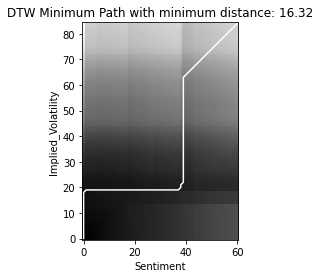

In [274]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df2.head()

#Quantifying Signal Synchrony - Dynamic Time Warping

from dtw import dtw,accelerated_dtw

dfNovemberSentiment['Compound_Score'] = pd.to_numeric(dfNovemberSentiment['Compound_Score'], downcast="float")

d1 = (dfNovemberSentiment['Compound_Score']).interpolate().values
d2 = ((df2['ask_price'] + df2['bid_price'])/2).interpolate().values

d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Sentiment')
plt.ylabel('Implied_Volatility')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

12
12
Scipy computed Pearson r: -0.09925135950643532 and p-value: 0.7589284043948837
    Sentiment_Data  Implied_Vol
0          0.01025     0.091429
1          0.00725     0.146253
2          0.00700     0.104174
3          0.00875     0.123255
4          0.00800     0.142336
5          0.00850     0.146800
6          0.00775     0.151263
7          0.00675     0.138420
8          0.00800     0.125578
9          0.00450     0.112735
10         0.00450     0.126292
11         0.00600     0.134767


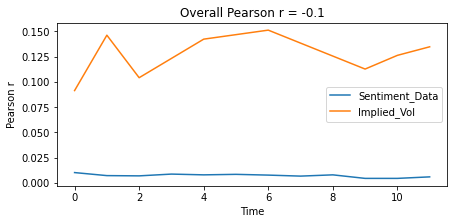

In [279]:
print(len(d1))
print(len(d2))
if (len(d1) > len(d2)):
    d1 = d1[0:len(d1)-(len(d1)-len(d2))]
    
# overall_pearson_r = np.correlate(d1, d2)
# print(f"Numpy computed Pearson r: {overall_pearson_r}")
# out: Pandas computed Pearson r: 0.2058774513561943

r, p = stats.pearsonr(d1, d2)
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# out: Scipy computed Pearson r: 0.20587745135619354 and p-value: 3.7902989479463397e-51

#df = pd.DataFrame(np.array([d1, d2]), columns=['Sentiment_Data', 'Implied_Vol'])

df = pd.DataFrame(data=d1, columns=['Sentiment_Data'])
df['Implied_Vol'] = d2

print(df)

# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(7,3))
df.rolling(window=1,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(r,2)}");

Numpy computed Pearson r: [212.96912443]
Scipy computed Pearson r: 0.4803560340136476 and p-value: 1.4050854508243895e-13
     Sentiment_Data  Implied_Vol
0          1.000000     1.000000
1          1.522505     1.048780
2          1.595857     1.048780
3          1.672520     1.048780
4          1.933115     1.048780
..              ...          ...
206        0.680003     0.634146
207        0.665564     0.609756
208        0.651126     0.609756
209        0.636688     0.585366
210        0.622249     0.585366

[211 rows x 2 columns]


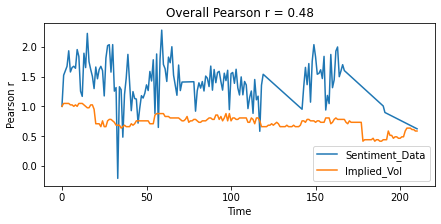

In [265]:
import copy

d1Return = copy.deepcopy(d1)
d2Return = copy.deepcopy(d2)    

for x in range(0, len(d1Return)):
    d1Return[x] = (d1[x])/d1[0]
    d2Return[x] = (d2[x])/d2[0]
    
overall_pearson_r = np.correlate(d1Return, d2Return)

print(f"Numpy computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(d1, d2)
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# out: Scipy computed Pearson r: 0.20587745135619354 and p-value: 3.7902989479463397e-51

#df = pd.DataFrame(np.array([d1, d2]), columns=['Sentiment_Data', 'Implied_Vol'])

df = pd.DataFrame(data=d1Return, columns=['Sentiment_Data'])
df['Implied_Vol'] = d2Return

print(df)

# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(7,3))
df.rolling(window=1,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(r,2)}");

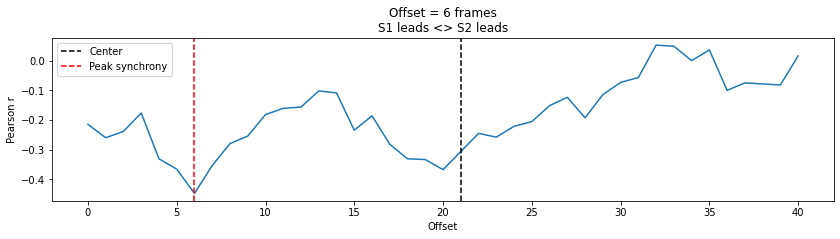

In [255]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        #r, p = stats.pearsonr(datax, shiftedy)
        return datax.corr(shiftedy, method='pearson')
    else: 
        #r, p = stats.pearsonr(datax, datay.shift(lag))
        return datax.corr(datay.shift(lag), method='pearson')

d1 = df['Sentiment_Data']
d2 = df['Implied_Vol']
seconds = 1
fps = 20
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.argmin(rs)

f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmin(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
plt.legend()

Text(0.5, 0.98, 'Sentiment Data w/ Implied - rolling window correlation')

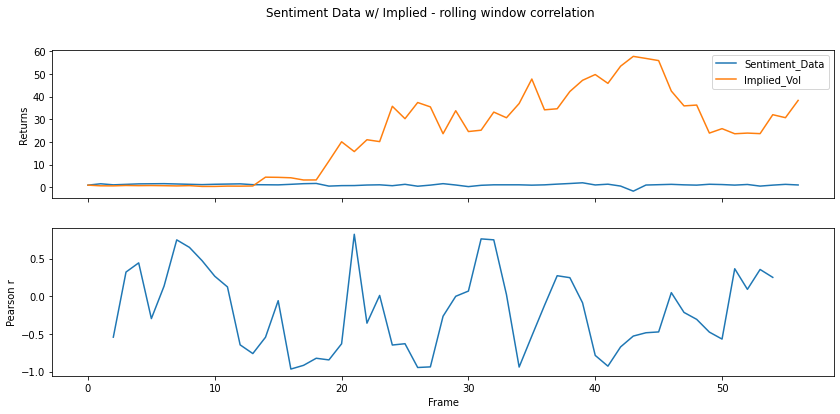

In [220]:
# Set window size to compute moving window synchrony.
r_window_size = 5
# Interpolate missing data.
df_interpolated = df.interpolate()
# Compute rolling window synchrony
rolling_r = df_interpolated['Sentiment_Data'].rolling(window=r_window_size, center=True).corr(df_interpolated['Implied_Vol'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df.rolling(window=1,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Returns')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Sentiment Data w/ Implied - rolling window correlation")


In [226]:
dfHourlyOptions = pd.read_csv('hourly/quoteData2018_11.csv')
#Make new dataframe with time stamp

dfHourlySentiment = pd.DataFrame(columns="Timestamp,Compound_Score,Total_Num_Tweets,Num_Negatives,Num_Positives,Num_Neutrals,Open,High,Low,Close,Volume (BTC),Volume (Currency)".split(","))
#dfNovemberOptions

for index, row in dfSentiment.iterrows():
    row_series = pd.Series(row, index = dfHourlySentiment.columns)
    if (row_series['Timestamp'].startswith("2018-11") and row_series['Timestamp'].endswith("00:00")):
        dfHourlySentiment = dfHourlySentiment.append(row_series, ignore_index=True)

In [229]:
dfHourlySentiment['Compound_Score'] = pd.to_numeric(dfHourlySentiment['Compound_Score'], downcast="float")

d1Hourly = (dfHourlySentiment['Compound_Score']).interpolate().values
d2Hourly = ((dfHourlyOptions['ask_price'] + dfHourlyOptions['bid_price'])/2).interpolate().values

print(len(d1Hourly))
print(len(d2Hourly))
if (len(d1Hourly) > len(d2Hourly)):
    d1Hourly = d1Hourly[0:len(d1Hourly)-(len(d1Hourly)-len(d2Hourly))]

720
211


Numpy computed Pearson r: [212.96912443]
Scipy computed Pearson r: 0.4803560324250243 and p-value: 1.4050857466077142e-13
     Sentiment_Data  Implied_Vol
0          1.000000     1.000000
1          1.522505     1.048780
2          1.595857     1.048780
3          1.672520     1.048780
4          1.933115     1.048780
..              ...          ...
206        0.680003     0.634146
207        0.665564     0.609756
208        0.651126     0.609756
209        0.636688     0.585366
210        0.622249     0.585366

[211 rows x 2 columns]


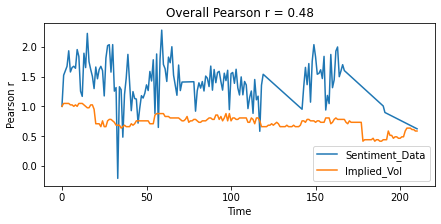

In [259]:
import copy

d1Return = copy.deepcopy(d1Hourly)
d2Return = copy.deepcopy(d2Hourly)    

for x in range(0, len(d1Return)):
    d1Return[x] = (d1Hourly[x])/d1Hourly[0]
    d2Return[x] = (d2Hourly[x])/d2Hourly[0]
    
overall_pearson_r = np.correlate(d1Return, d2Return)

print(f"Numpy computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(d1Hourly, d2Hourly)
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# out: Scipy computed Pearson r: 0.20587745135619354 and p-value: 3.7902989479463397e-51

#df = pd.DataFrame(np.array([d1, d2]), columns=['Sentiment_Data', 'Implied_Vol'])

df = pd.DataFrame(data=d1Return, columns=['Sentiment_Data'])
df['Implied_Vol'] = d2Return

print(df)

# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(7,3))
df.rolling(window=1,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(r,2)}");

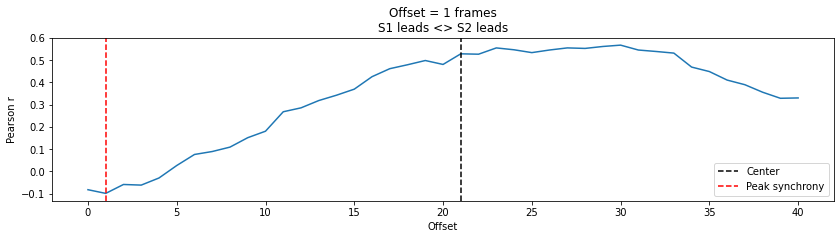

In [260]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df['Sentiment_Data']
d2 = df['Implied_Vol']
seconds = 1
fps = 20
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.argmin(rs)

f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmin(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
plt.legend()

Text(0.5, 0.98, 'Sentiment Data w/ Implied - rolling window correlation')

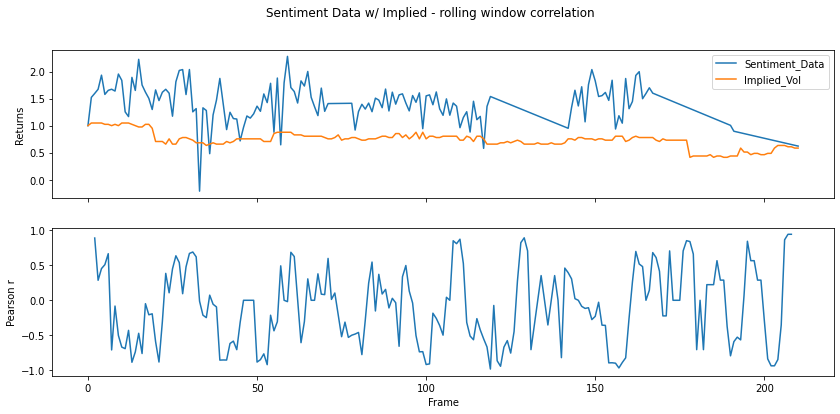

In [261]:
# Set window size to compute moving window synchrony.
r_window_size = 5
# Interpolate missing data.
df_interpolated = df.interpolate()
# Compute rolling window synchrony
rolling_r = df_interpolated['Sentiment_Data'].rolling(window=r_window_size, center=True).corr(df_interpolated['Implied_Vol'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df.rolling(window=1,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Returns')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Sentiment Data w/ Implied - rolling window correlation")
